# Loading the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nk
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS, CountVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
import re

In [4]:
import os
os.getcwd()
os.chdir("/Users/pratham/Downloads/Text Classification - HealthCare")
df = pd.read_csv("TextClassification_Data.csv")

In [3]:
df.describe()

,fileid
count,5.728000e+04
mean,4.268852e+12
std,6.249354e+12
min,2.015111e+09
25%,2.015249e+12
50%,2.015471e+12
75%,2.015691e+12
max,2.015712e+13


In [221]:
np.shape(df)

(57280, 7)

In [222]:
df.head(n=6)

,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,2015561331001,Pt aware that he needs ROV for refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
1,2015561341001,Mom wants to know if the Focalin needs some do...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2,2015561351001,pt called to discuss nortryptiline. she says s...,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001
3,2015561361001,FYI Nortryptline medication.,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6136_1001
4,2015561371001,Letter of patient establishment request,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6137_1001
5,2015561401001,Appt question,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,APPOINTMENTS,QUERY ON CURRENT APPOINTMENT,No,2015_5_6140_1001


In [223]:
df.tail(n=6)

,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
57274,2015561201001,pts wife would like a cb,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6120_1001
57275,2015561221001,Out of meds -LOST RXS,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6122_1001
57276,2015561261001,pt's mom called to report a migraine,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6126_1001
57277,2015561271001,Dental clearance,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6127_1001
57278,2015561281001,Catheter documentation,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6128_1001
57279,2015561311001,status of FMLA form?- awaiting MD completion,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,OTHERS,No,2015_5_6131_1001


In [5]:
from nltk import FreqDist

freq_summary = FreqDist(df.iloc[:,1])

# show most 10 frequent word in the summary
print freq_summary.most_common(10)

[(nan, 3347), ('Phone Note', 3143), ('SCHEDULED', 376), ('scheduled', 238), ('rx refill', 201), ('pt would like a cb', 156), ('running late', 153), ('MRI results', 124), ('ESI', 111), ('Rx refill request', 103)]


In [6]:
#Remove Punctuation Marks
import string

def removePunctuation(a):
    a = a.translate(None, string.punctuation)
    return a

In [7]:
#Remove Numbers
def removeDigits(a):
    a = ''.join([i for i in a if not i.isdigit()])
    return a

In [8]:
#Case folding
def caseFold(a):
    a = a.lower()
    return a

In [9]:
#Tokenization
from nltk.tokenize import word_tokenize

def tokenize(a):
    a = word_tokenize(a)
    return a

In [10]:
#Stopwords Removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def removeStopwords(word_tokens):
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    word_tokens = filtered_sentence
    return word_tokens

In [11]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english") #SnowballStemmer("english", ignore_stopwords=True)

def stemWord(a):
    l = []
    for w in a:
        l.append(stemmer.stem(w))
    a = l
    return a

In [12]:
#Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

def lemmatizer(a):
    l = []
    for w in a:
        l.append(lmtzr.lemmatize(w))
    a = l
    return a

In [13]:
#Remove Whitespace
import string
def stripWhiteSpaces(a):
    l = []
    for w in a:
        l.append(w.replace("  "," "))
    a = l
    return a


In [14]:
#Convert tokens back to sentence
import nltk
import string

def detokenizer(a):
    a = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in a]).strip()
    return a

In [15]:
#Remove Unnecessary occurence of "u"
import string
def removeU(a):
    l = []
    for w in a:
        l.append(w.replace("u",""))
    a = l
    return a

In [16]:
#Convert ascii to unicode
def asciiToUni(a):
    a= a.decode('utf-8')
    return a

# Pre-processing

In [17]:
corpus = df.copy()

In [20]:
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: asciiToUni(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: removePunctuation(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: removeDigits(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: caseFold(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: tokenize(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: removeStopwords(a))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: stemWord(a))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: lemmatizer(a))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: detokenizer(a))

In [239]:
corpus["SUMMARY"].head(n=6)

0                      pt awar need rov refil
1     mom want know focalin need dosag adjust
2    pt call discus nortryptilin say weird ta
3                       fyi nortryptlin medic
4            letter patient establish request
5                               appt question
Name: SUMMARY, dtype: object

In [240]:
corpus["SUMMARY"].tail(n=6)

57274                pt wife would like cb
57275                         med lost rxs
57276           pt mom call report migrain
57277                      dental clearanc
57278                      cathet document
57279    status fmla form await md complet
Name: SUMMARY, dtype: object

In [241]:
df["SUMMARY"].head(n=6)

0                Pt aware that he needs ROV for refill
1    Mom wants to know if the Focalin needs some do...
2    pt called to discuss nortryptiline. she says s...
3                         FYI Nortryptline medication.
4              Letter of patient establishment request
5                                        Appt question
Name: SUMMARY, dtype: object

# Comparision

Comparsion between the raw "SUMMARY" column and after pre-processing steps have been applied.

In [242]:
comparison = pd.DataFrame({'Before':df["SUMMARY"],'After': corpus["SUMMARY"]})
comparison.head(n=5)

,After,Before
0,pt awar need rov refil,Pt aware that he needs ROV for refill
1,mom want know focalin need dosag adjust,Mom wants to know if the Focalin needs some do...
2,pt call discus nortryptilin say weird ta,pt called to discuss nortryptiline. she says s...
3,fyi nortryptlin medic,FYI Nortryptline medication.
4,letter patient establish request,Letter of patient establishment request


# Missing Value Analysis and Imputation

In [19]:
#Missing values
corpus.isnull().values.ravel().sum()

2

In [244]:
#Missing value by category
corpus.isnull().sum()

fileid                  0
SUMMARY                 0
DATA                    0
categories              0
sub_categories          0
previous_appointment    2
ID                      0
dtype: int64

In [21]:
#Missing Value Imputation
#from sklearn.preprocessing import Imputer
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
corpus = DataFrameImputer().fit_transform(corpus)



In [22]:
#No missing values
corpus.isnull().sum()

fileid                  0
SUMMARY                 0
DATA                    0
categories              0
sub_categories          0
previous_appointment    0
ID                      0
dtype: int64

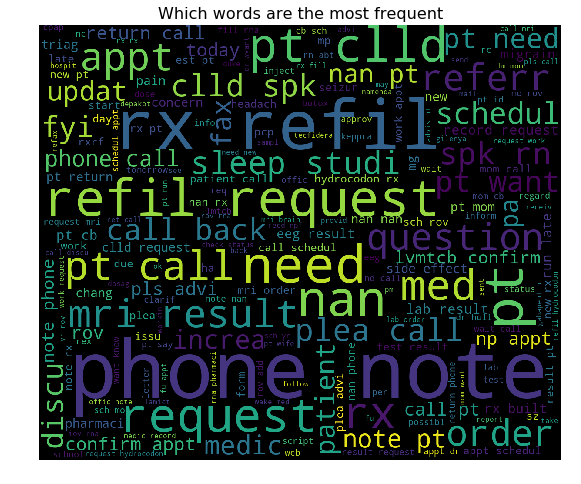

In [431]:
plt.figure(figsize = (12,8))
SUMMARY_cloud = ' '.join(corpus.iloc[:,1])
wc = WordCloud(background_color = 'black', width = 1200, height = 1000).generate(SUMMARY_cloud)
plt.imshow(wc)
plt.axis('off')
plt.title('Which words are the most frequent', fontsize = 16)
plt.show()
del (SUMMARY_cloud, wc)

In [ ]:
#Distribution of number of words present in text

In [247]:
def word_count(text):
    return len(text.split())
SUMMARY_count = np.vectorize(word_count)(corpus.iloc[:,1])

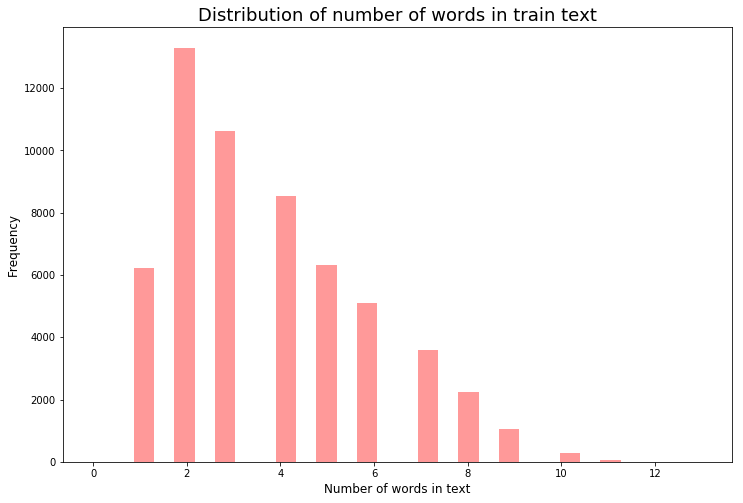

In [209]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.distplot(SUMMARY_count, bins=30, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distribution of number of words in train text", fontsize=18)
plt.show()
del SUMMARY_count

In [23]:
#RTF Formatted Text
#Converting every string to standard rtf format

def rtf1(a):
    if a.startswith("xxxx-xxxx"):
        a = a.replace("xxxx-xxxx","{\rtf1\ansi\ftnbj{\fonttbl{")
        return a
    else:
        a = a
        return a

def rtf2(a):
    if a.endswith("}"):
        a = a
        return a
    else:
        a = a + str("}")
        return a

In [24]:
corpus["DATA"] = corpus["DATA"].map(lambda a: rtf1(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: rtf2(str(a)))

In [24]:
corpus["DATA"].head(n=6)

0    {\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...
1    {\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...
2    {\rtf1nsitnbj{onttbl{\f0 \fswiss Arial;}}{\...
3    {\rtf1nsitnbj{onttbl{\f0 \fswiss Arial;}}{\...
4    {\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...
5    {\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...
Name: DATA, dtype: object

In [25]:
def sanitize(call_data):
	call_data = call_data.split()
	
	''' 
	Removing Empty Elements and all the unnecessary elements. *Debatable*
	Storing the cleaned string back into a file specfied at the compile time
	''' 

	call_data = [x for x in call_data if x != '']	
	call_data = [x for x in call_data if "\\" not in x ]
	call_data = ' '.join(call_data)
	return call_data

In [26]:
def CleanText(a):
    if a.startswith("{ tf1nsi tnbj{ "):
        a = a.replace("{ tf1nsi tnbj{ ","")
        return a
    else:
        a = a
        return a


In [27]:
def delDefault(a):
    if a.startswith("default paragraph"):
        a = a.replace("default paragraph","")
        return a
    else:
        a = a
        return a
#corpus["DATA"] = corpus["DATA"].map(lambda a: delDefault(str(a)))
delDefault("default paragraph phone note call patient back")

' phone note call patient back'

In [28]:
corpus["DATA"] = corpus["DATA"].map(lambda a: sanitize(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: CleanText(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: delDefault(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: asciiToUni(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: removePunctuation(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: removeDigits(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: caseFold(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: tokenize(str(a)))
corpus["DATA"] = corpus["DATA"].map(lambda a: removeStopwords(a))
corpus["DATA"] = corpus["DATA"].map(lambda a: stemWord(a))
corpus["DATA"] = corpus["DATA"].map(lambda a: lemmatizer(a))
corpus["DATA"] = corpus["DATA"].map(lambda a: detokenizer(a))

In [29]:
corpus["DATA"] = corpus["DATA"].map(lambda a: delDefault(str(a)))

In [30]:
corpus["DATA"].head(n=6)

0     phone note call patient back cell call caller...
1     phone note call patient back cell call caller...
2     phone note call patient back home phonecal ca...
3     phone note call patient back home phonecal ca...
4     phone note call patient back call caller name...
5     phone note call patient back cell call caller...
Name: DATA, dtype: object

In [259]:
comparison = pd.DataFrame({'Before':df["DATA"],'After': corpus["DATA"]})
comparison.head(n=5)

,After,Before
0,phone note call patient back cell call caller...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...
1,phone note call patient back cell call caller...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...
2,phone note call patient back home phonecal ca...,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...
3,phone note call patient back home phonecal ca...,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...
4,phone note call patient back call caller name...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...


# Wordcloud Data

In [78]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(corpus["DATA"]))

In [77]:
from wordcloud import WordCloud

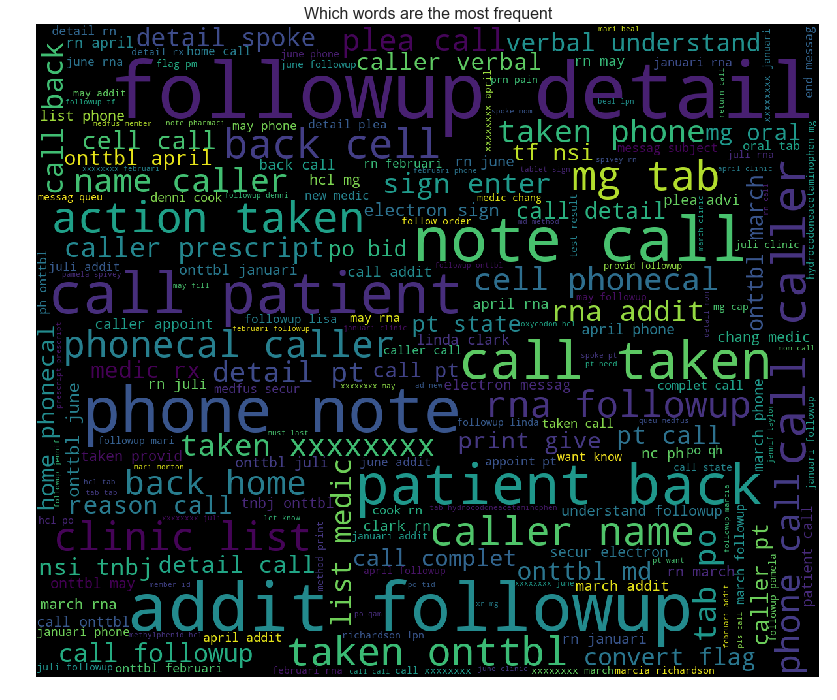

In [281]:
plt.figure(figsize = (16,12))
DATA_cloud = ' '.join(corpus.iloc[:,2])
wc = WordCloud(background_color = 'black', width = 1200, height = 1000).generate(DATA_cloud)
plt.imshow(wc)
plt.axis('off')
plt.title('Which words are the most frequent', fontsize = 16)
plt.show()
del (DATA_cloud, wc)

Distribution of number of words present in text

In [216]:
def word_count(text):
    return len(text.split())
DATA_count = np.vectorize(word_count)(corpus.iloc[:,2])

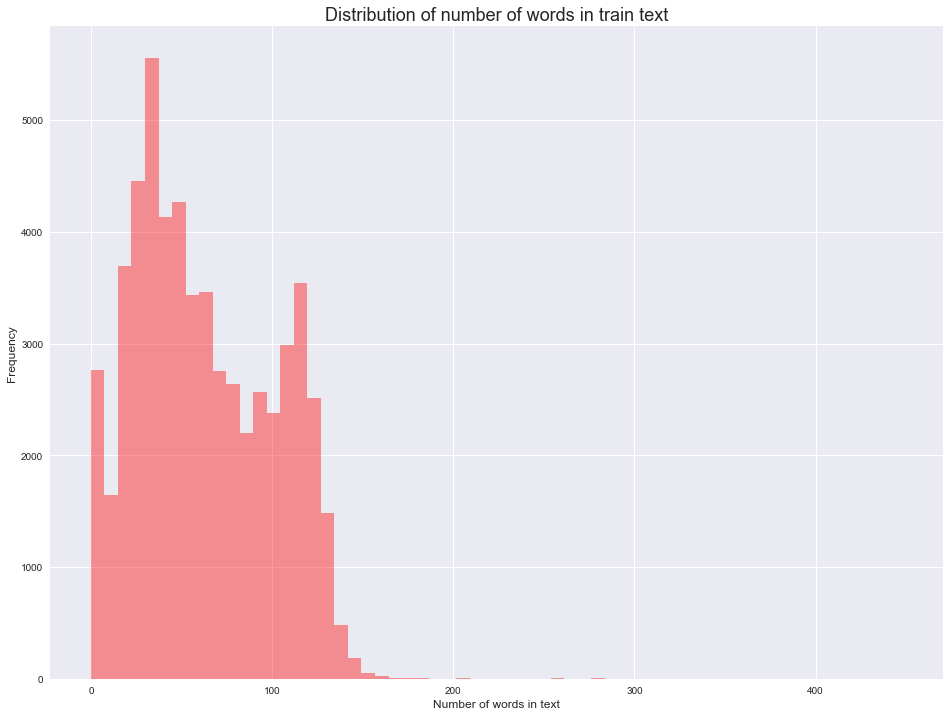

In [217]:
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.distplot(DATA_count, bins=60, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distribution of number of words in train text", fontsize=18)
plt.show()
del DATA_count

In [31]:
#Converting previous Appointment to categorical variable
corpus["previous_appointment"] = corpus["previous_appointment"].astype("category")

In [32]:
np.unique(corpus["previous_appointment"])

array(['NO', 'No', 'YES', 'Yes', 'yes'], dtype=object)

In [33]:
def getNumCategory(a):
    if a == "NO":
        a = int("0")
        return a
    elif a == "No":
        a = int("0")
        return a
    elif a == "YES":
        a = int("1")
        return a
    elif a == "Yes":
        a = int("1")
        return a
    elif a == "yes":
        a = int("1")
        return a
    else:
        a = int("0")
        return a


In [34]:
#Converting into categories of 0 and 1
corpus["previous_appointment"] = corpus["previous_appointment"].map(lambda a: getNumCategory(a))

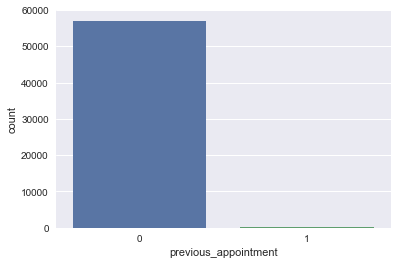

In [268]:
#Count plot
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="previous_appointment", data=corpus)
plt.show()

In [35]:
#Categories
from nltk import FreqDist

freqCategory = FreqDist(corpus["categories"])

print freqCategory.most_common(8)

[('PRESCRIPTION', 15096), ('APPOINTMENTS', 13872), ('MISCELLANEOUS', 12167), ('ASK_A_DOCTOR', 11799), ('LAB', 4321), ('JUNK', 21), ('mISCELLANEOUS', 3), ('asK_A_DOCTOR', 1)]


In [35]:
corpus["categories"] = corpus["categories"].astype("category")

In [36]:
def remNoiseCat(a):
    if a == "PRESCRIPTION":
        return a
    elif a == "APPOINTMENTS":
        return a
    elif a == "MISCELLANEOUS":
        return a
    elif a == "ASK_A_DOCTOR":
        return a
    elif a == "LAB":
        return a
    elif a == "JUNK":
        a = "PRESCRIPTION"
        return a
    elif a == "mISCELLANEOUS":
        a = "MISCELLANEOUS"
        return a
    elif a == "asK_A_DOCTOR":
        a = "ASK_A_DOCTOR"
        return a
    else:
        return a

In [37]:
#Removing noise from the categories
corpus["categories"] = corpus["categories"].map(lambda a: remNoiseCat(a))

In [39]:
#Categories
from nltk import FreqDist

freqCategory = FreqDist(corpus["categories"])
print freqCategory.most_common(8)

[('PRESCRIPTION', 15117), ('APPOINTMENTS', 13872), ('MISCELLANEOUS', 12170), ('ASK_A_DOCTOR', 11800), ('LAB', 4321)]


In [40]:
#Sub_Categories
from nltk import FreqDist

freqCategory = FreqDist(corpus["sub_categories"])

print freqCategory.most_common()

[('MEDICATION RELATED', 10598), ('NEW APPOINTMENT', 10478), ('REFILL', 9819), ('OTHERS', 7356), ('SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)', 3550), ('LAB RESULTS', 2650), ('PROVIDER', 1972), ('QUERIES FROM PHARMACY', 1722), ('RESCHEDULING', 1626), ('SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)', 1425), ('PRIOR AUTHORIZATION', 1226), ('SYMPTOMS', 1201), ('CHANGE OF PROVIDER', 953), ('RUNNING LATE TO APPOINTMENT', 694), ('CANCELLATION', 663), ('QUERY ON CURRENT APPOINTMENT', 657), ('FOLLOW UP ON PREVIOUS REQUEST', 357), ('CHANGE OF HOSPITAL', 149), ('QUERIES FROM INSURANCE FIRM', 107), ('CHANGE OF PHARMACY', 55), ('JUNK', 21), ('mEDICATION RELATED', 1)]


In [38]:
corpus["sub_categories"] = corpus["sub_categories"].astype("category")

In [39]:
def remNoiseSubCat(a):
    if a == "mEDICATION RELATED":
        a = "MEDICATION RELATED"
        return a
    elif a == "JUNK":
        a = "OTHERS"
        return a
    else:
        return a

In [40]:
#Removing noise from the sub - categories
corpus["sub_categories"] = corpus["sub_categories"].map(lambda a: remNoiseSubCat(a))

In [45]:
#Sub_Categories
from nltk import FreqDist

freqCategory = FreqDist(corpus["sub_categories"])

print freqCategory.most_common()

[('MEDICATION RELATED', 10599), ('NEW APPOINTMENT', 10478), ('REFILL', 9819), ('OTHERS', 7377), ('SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)', 3550), ('LAB RESULTS', 2650), ('PROVIDER', 1972), ('QUERIES FROM PHARMACY', 1722), ('RESCHEDULING', 1626), ('SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)', 1425), ('PRIOR AUTHORIZATION', 1226), ('SYMPTOMS', 1201), ('CHANGE OF PROVIDER', 953), ('RUNNING LATE TO APPOINTMENT', 694), ('CANCELLATION', 663), ('QUERY ON CURRENT APPOINTMENT', 657), ('FOLLOW UP ON PREVIOUS REQUEST', 357), ('CHANGE OF HOSPITAL', 149), ('QUERIES FROM INSURANCE FIRM', 107), ('CHANGE OF PHARMACY', 55)]


# Modelling

# TF-IDF

In [ ]:
#Predicting Categories

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.cross_validation import train_test_split
y = corpus.pop('categories')

/Users/pratham/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
X = corpus

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [45]:
X_test.head()

,fileid,SUMMARY,DATA,sub_categories,previous_appointment,ID
26735,2015372711001,conni cigna question pa cyclobenzaprin,phone note call patient back call caller name...,PRIOR AUTHORIZATION,0,2015_3_7271_1001
12102,201525071001,pt request workin dr kirk,phone note call patient back home phonecal ca...,NEW APPOINTMENT,0,2015_2_507_1001
42682,2015544841001,pt clld spk rn azilect rx,phone note call patient back home phonecel ph...,REFILL,0,2015_5_4484_1001
32897,2015442151001,pt old pt new tremor problem,phone note call patient back home call caller...,NEW APPOINTMENT,0,2015_4_4215_1001
52195,2015740141001,phone note,phone note call patient back call caller name...,OTHERS,0,2015_7_4014_1001


(17184, 6)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()


In [47]:
vect.fit(X_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [48]:
vect.get_feature_names()

[u'data',
 u'fileid',
 u'id',
 u'previous_appointment',
 u'sub_categories',
 u'summary']

In [49]:
#Convert into document term matrix
X_train_tdm = vect.transform(X_train)

In [50]:
X_train_tdm

<6x6 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [51]:
#Convert sparse matrix to dense matrix
X_train_tdm.toarray()

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [52]:
#Examine the vocabulary and document term matrix together
pd.DataFrame(X_train_tdm.toarray(),columns = vect.get_feature_names())

,data,fileid,id,previous_appointment,sub_categories,summary
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
5,0,0,1,0,0,0


In [53]:
#Check the type of document term matrix
type(X_train_tdm)

scipy.sparse.csr.csr_matrix

In [54]:
X_test_tdm = vect.transform(X_test)

In [55]:
X_test_tdm

<6x6 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [104]:
#Building and Evaluating our model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [105]:
np.shape(y_train)

(40096,)

In [106]:
y_train.values.reshape((40096,1))

array([['PRESCRIPTION'],
       ['PRESCRIPTION'],
       ['APPOINTMENTS'],
       ..., 
       ['PRESCRIPTION'],
       ['PRESCRIPTION'],
       ['PRESCRIPTION']], dtype=object)

In [61]:
#Train the model using X_train_tdm
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [1]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(X_train_tdm)

In [3]:
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
#Calculating accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

In [ ]:
#Confusion matrix
metrics.confusion_matrix(y_test,y_pred_class)

In [ ]:
#AUC score
metrics.roc_auc_score(y_test,y_pred_prob)